# Supervised Learning Capstone Project 

## Tree Methods Focus -     ON Telecome and Internet Providing Company

### Task we will Perform in this Data set
#### 1. Exploratory Data Analysis
#### 2. Cohort Analysis
#### 3. Imbalance class Analysis  (SMOTE METHOD USED)
#### 4. Predictive Classification Models  

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir(r'E:\Python Project data\Capstone Project on ML 1')

In [3]:
os.listdir()

['17-Supervised-Learning-Capstone-Project',
 '17-Supervised-Learning-Capstone-Project.zip',
 'Telco-Customer-Churn.csv']

In [4]:
df=pd.read_csv(r'Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7032, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
df.describe(percentiles=(0.01,.02,.03,.04,.05,.25,.50,.75,.90,.95,.96,.97,.98,.99))

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
1%,0.000000,1.000000,19.200000,19.900000
2%,0.000000,1.000000,19.350000,20.550000
3%,0.000000,1.000000,19.500000,32.644000
4%,0.000000,1.000000,19.600000,44.562000
5%,0.000000,1.000000,19.650000,49.605000
25%,0.000000,9.000000,35.587500,401.450000


#### Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.

# **Part 1:** Exploratory Data Analysis

### General Feature Exploration 

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Confirm that there are no NaN cells by displaying NaN values per feature column.

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='Churn', ylabel='count'>

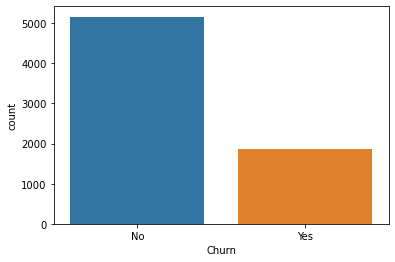

In [10]:
sns.countplot(data=df,x='Churn')

#### Displayed the balance of the class labels (Churn = People leave the service) with a Count Plot.

In [11]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

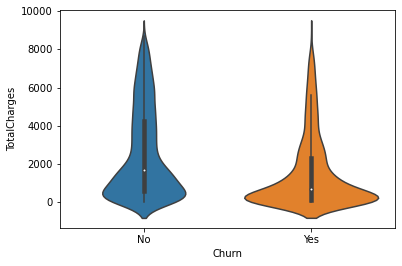

In [12]:
sns.violinplot(data=df,x='Churn',y='TotalCharges')

#### Exploring the distrbution of TotalCharges between Churn categories with a Violin Plot.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

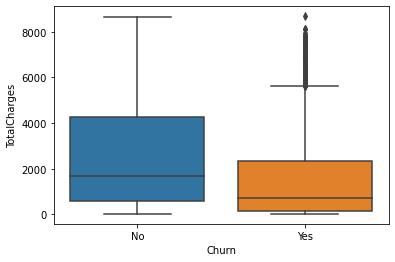

In [13]:
sns.boxplot(data=df,x='Churn',y='TotalCharges')

#### Exploring the distrbution of TotalCharges between Churn categories with a Box Plot.

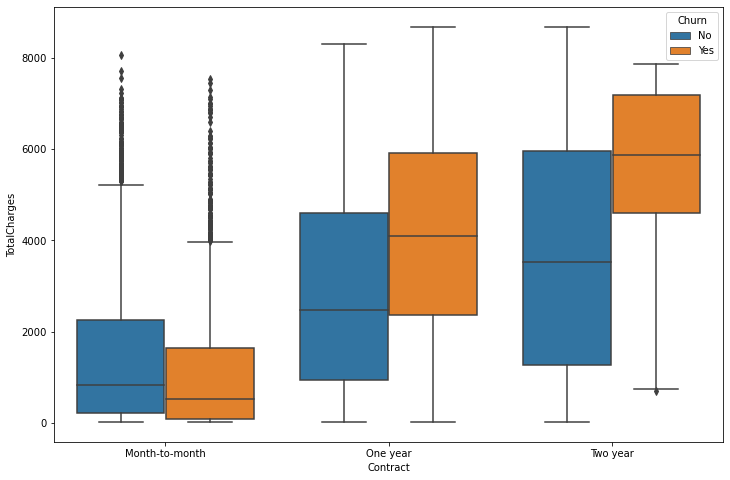

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.show()

#### Created a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.

In [15]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### We specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID.
#### Checking Correlation 

In [16]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()
corr_df.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
gender_Female,0.001819,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
Partner_Yes,0.016957,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,...,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982


In [17]:
corr_df['Churn_Yes'].sort_values()

Churn_No                                  -1.000000
Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

In [18]:
corr_yes_churn=corr_df['Churn_Yes'].sort_values().iloc[1:-1]

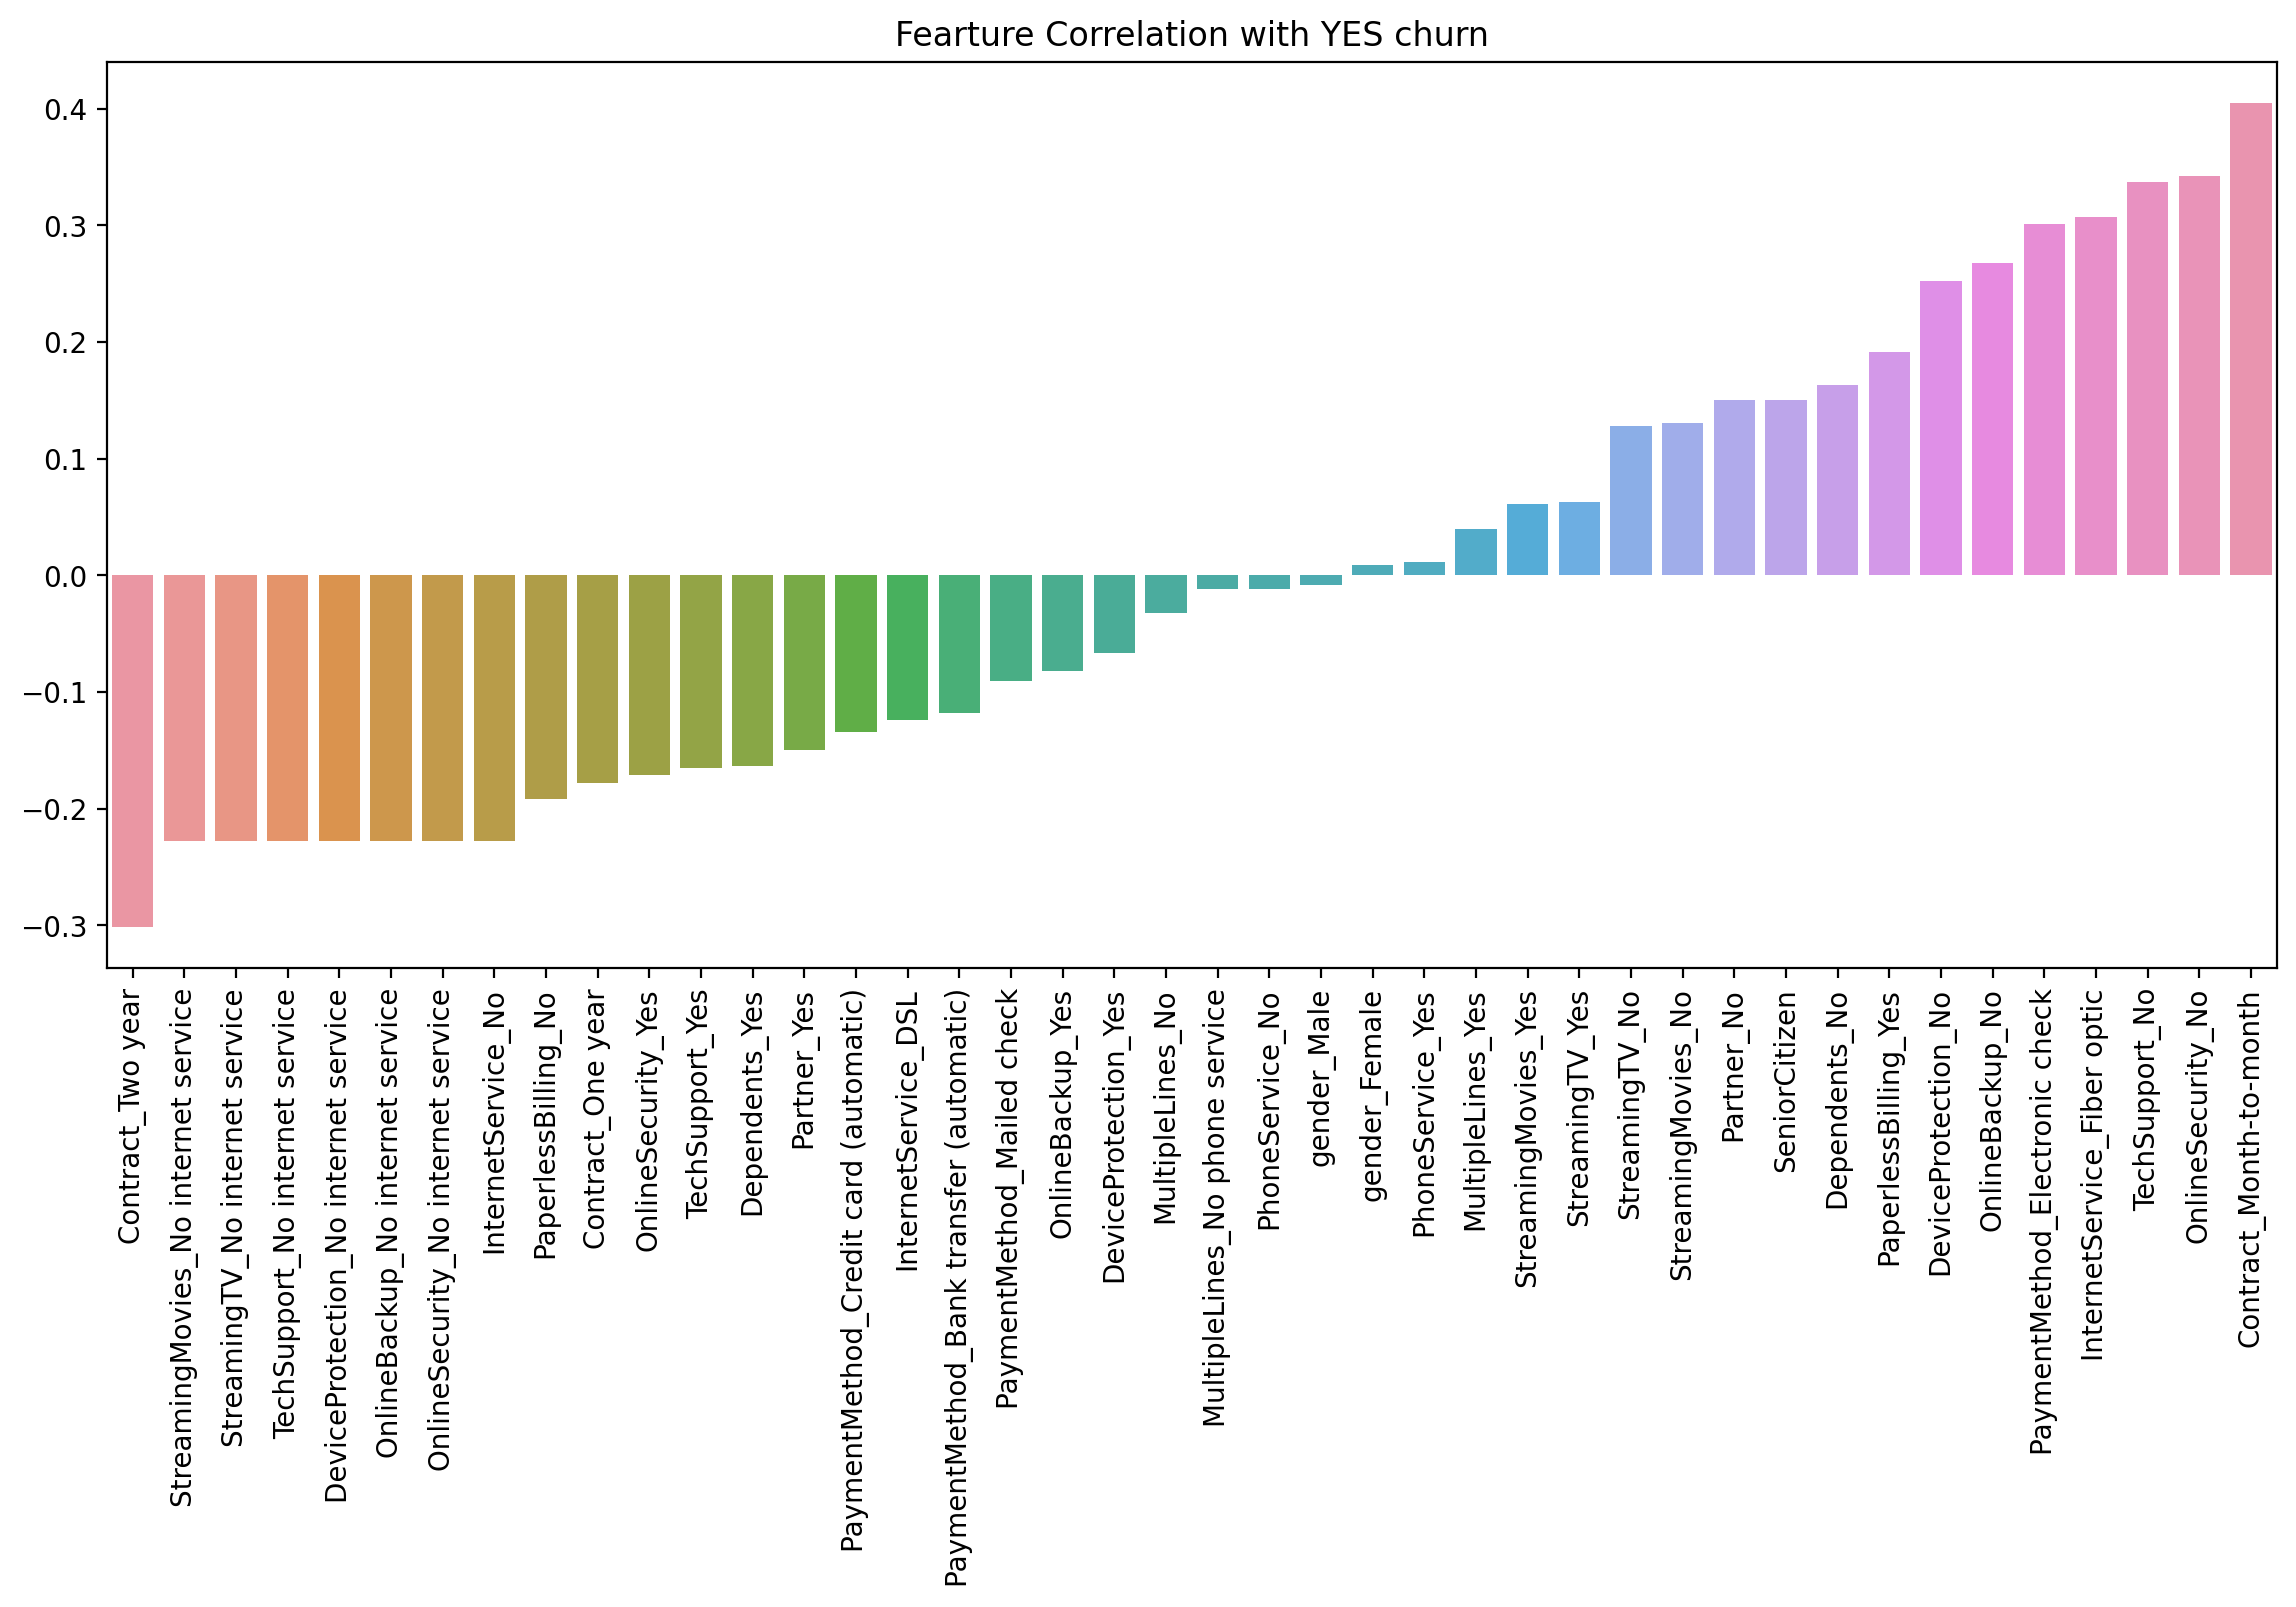

In [19]:
plt.figure(figsize=(14,6),dpi=200)  # dpi=(dot per inch)
plt.title('Fearture Correlation with YES churn')
sns.barplot(x=corr_yes_churn.index ,y=corr_yes_churn.values)
plt.xticks(rotation=90);
plt.show()

# **Part 2:** Cohort Analysis

#### This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.

In [20]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
df['tenure'].unique() # tenure is in month

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

In [22]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

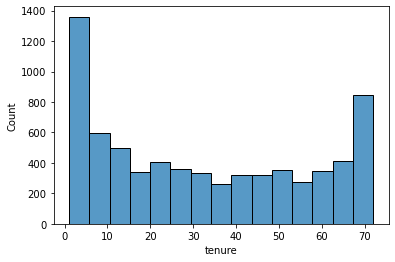

In [23]:
sns.histplot(data=df ,x='tenure')

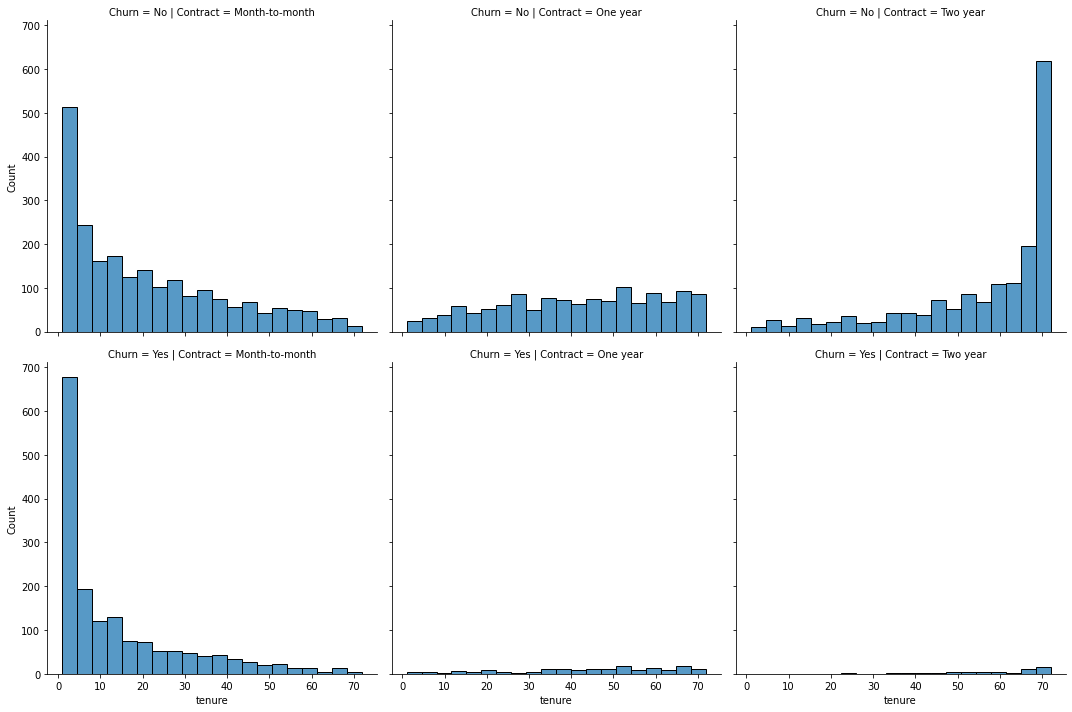

In [24]:
sns.displot(data=df,x='tenure',col='Contract',row='Churn',bins=20) #bins= No. of bars to be plot in each graph

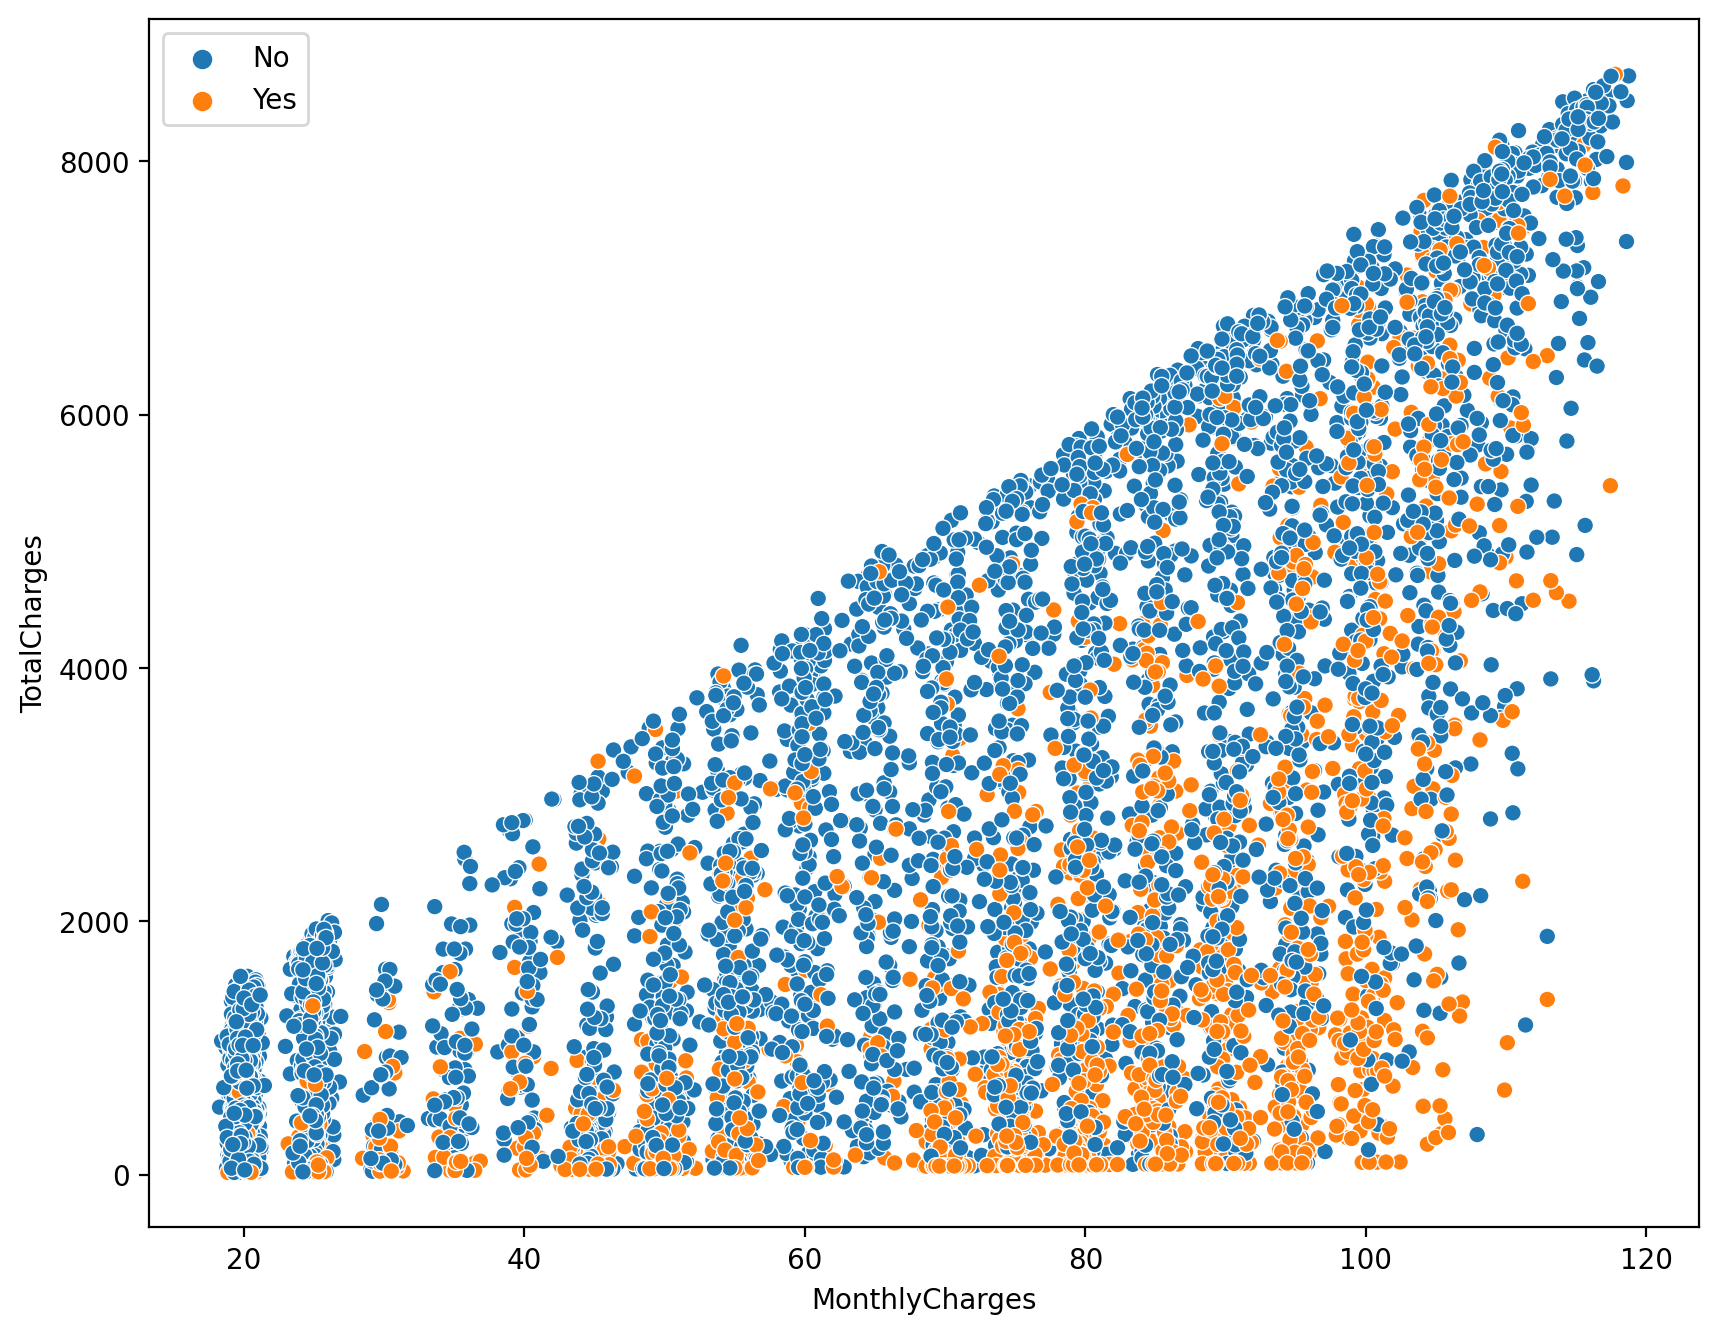

In [25]:
plt.figure(figsize=(10,8),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn')
plt.legend()
plt.show()

## Creating Cohort on the basis of tenure

#### Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.

Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.

In [26]:
yes_churn=df.groupby(['Churn','tenure']).count().T['Yes']
yes_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
gender,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Partner,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Dependents,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
PhoneService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
MultipleLines,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
InternetService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineSecurity,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineBackup,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6


In [27]:
no_churn=df.groupby(['Churn','tenure']).count().T['No']
no_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [28]:
#calculating Churn rate in percentage for each tenure
churn_rate=100*yes_churn/(no_churn+yes_churn)

In [29]:
churn_rate.T['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

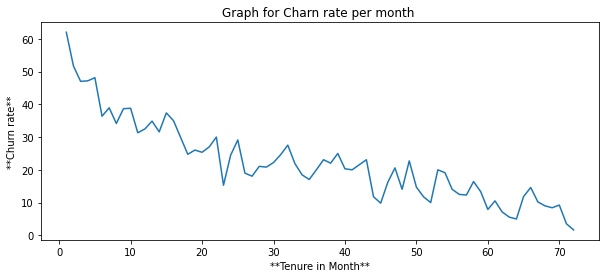

In [30]:
plt.figure(figsize=(10,4))
plt.plot(churn_rate.T['customerID'])
plt.xlabel('**Tenure in Month**')
plt.ylabel('**Churn rate**')
plt.title('Graph for Charn rate per month ')
plt.show()

#### Based on the tenure column values, we are creating a new column call as  Tenure Cohort that have creates 4 separate categories:

##### --> '0-12 Months'
##### --> '24-48 Months'
##### --> '12-24 Months'
##### --> 'Over 48 Months'

In [31]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

In [32]:
def tenure_cat(x):
    if x<13:
        return '0-12 Months'
    elif x<25:
        return '12-24 Months'
    elif x<49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'
    

In [33]:
df['Tenure_Cohort']=df['tenure'].apply(tenure_cat)

In [34]:
df['Tenure_Cohort'].value_counts()

Over 48 Months    2239
0-12 Months       2175
24-48 Months      1594
12-24 Months      1024
Name: Tenure_Cohort, dtype: int64

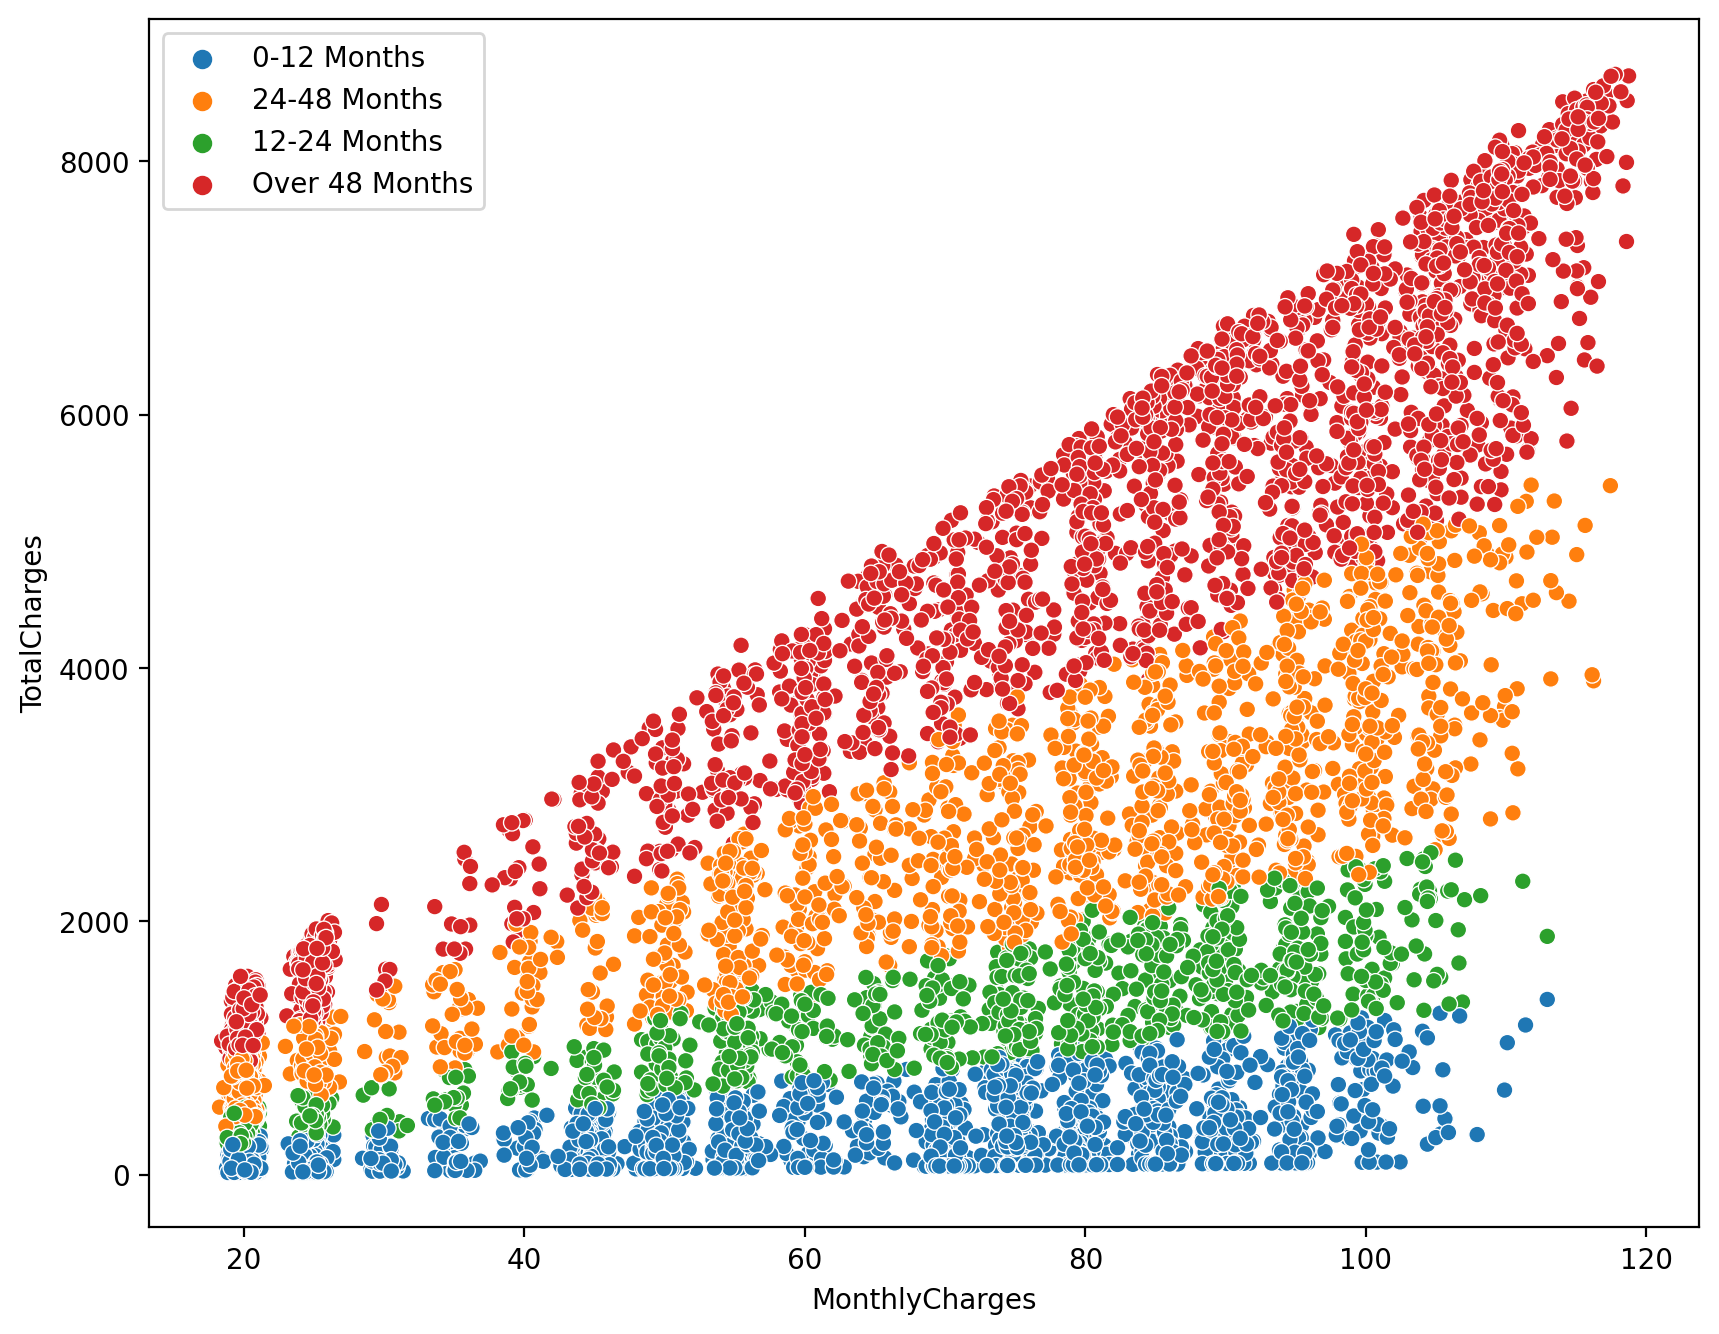

In [35]:
plt.figure(figsize=(10,8),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure_Cohort')
plt.legend()
plt.show()

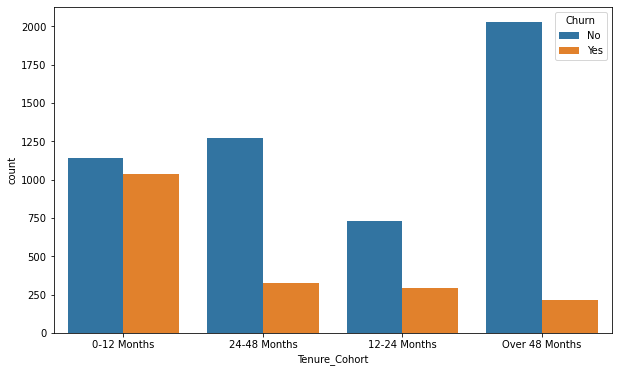

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Tenure_Cohort',hue='Churn')
plt.show()

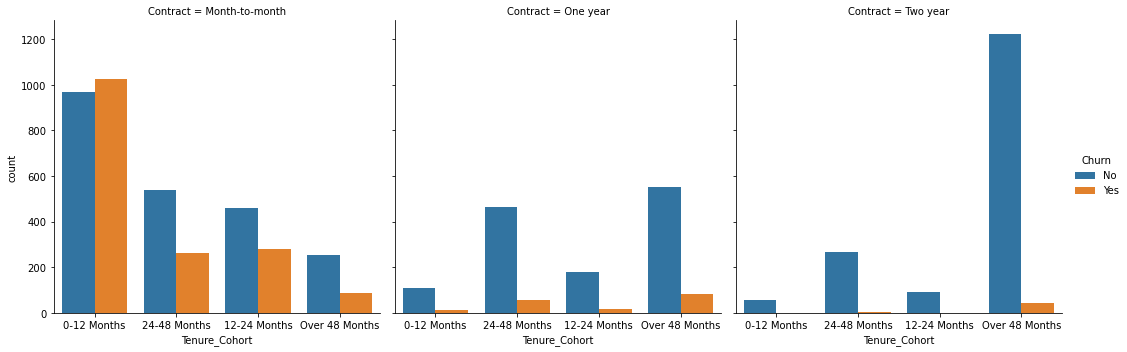

In [37]:
sns.catplot(data=df,x='Tenure_Cohort',hue='Churn',kind='count',col='Contract')

# **Part 3:** Imbalance class Analysis
The analysis of imbalanced class distribution is important because it can affect the performance of classification models. Models trained on imbalanced datasets tend to have poor predictive performance on the minority class, as they are biased towards the majority class. Therefore, it is essential to identify and address imbalanced class distribution to improve the classification performance of the models.

<AxesSubplot:xlabel='Churn', ylabel='count'>

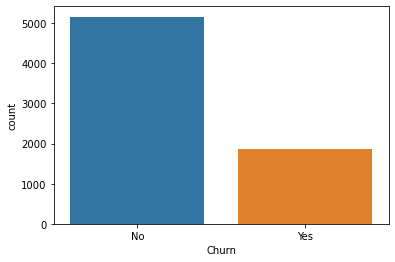

In [38]:
sns.countplot(data=df,x='Churn')

In [39]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

 It is definatily as imbalance class problem. To resolve this problem we need to Normalize the data set by using   Standscaler or by Using MinMaxscaler tools through which we can predict the actual Model. 

In [40]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months


Here we need to drop this [customerID] columns because it is unique and if we create dummies from it .
it will create multiple culumns.

In [41]:
df.drop(columns=['customerID'],inplace=True)

In [42]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Tenure_Cohort'],
      dtype='object')

## Class Balancing using SMOTE
In many real-world classification problems, the class distribution of the dataset is often imbalanced,   where one  class has significantly fewer samples than the other classes. This can lead to biased models that perform poorly on the minority class. One popular method to address this issue is Synthetic Minority Over-sampling Technique. (SMOTE). In this project, we propose to use SMOTE to balance the class distribution of our dataset and improve the classification performance of our models.

In [43]:
df=pd.get_dummies(df)

In [44]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,Tenure_Cohort_0-12 Months,Tenure_Cohort_12-24 Months,Tenure_Cohort_24-48 Months,Tenure_Cohort_Over 48 Months
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,1,0,0,1,1,0,0,0


In [45]:
y=df['Churn_Yes']
x=df.drop(columns=['Churn_Yes','Churn_No'])

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
smote = SMOTE(random_state=0, k_neighbors=7)
X_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)
X_test_balanced, y_test_balanced = smote.fit_resample(x_test, y_test)

In [50]:
def new_ratio(y):
    zero=len(y)-y.sum()
    one=y.sum()
    rro=round(((one/len(y))*100),2)
    rrz=round(((zero/len(y))*100),2)
    print(f"Class ratio 1 ({one}) :0 ({zero}) is {rro}% : {rrz}%") 

In [51]:
new_ratio(y_train)

Class ratio 1 (1314) :0 (3608) is 26.7% : 73.3%


In [52]:
new_ratio( y_train_balanced)

Class ratio 1 (3608) :0 (3608) is 50.0% : 50.0%


In [53]:
new_ratio(y_test)

Class ratio 1 (555) :0 (1555) is 26.3% : 73.7%


In [54]:
new_ratio(y_test_balanced)

Class ratio 1 (1555) :0 (1555) is 50.0% : 50.0%


# **Part 4:** Predictive Classification Models 

### **1.** Logestic Regression model asigning

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,precision_score,accuracy_score

In [56]:
lr=LogisticRegression()
lr.fit(X_train_balanced, y_train_balanced)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_train_balanced_pred=lr.predict(X_train_balanced)
y_test_balanced_pred=lr.predict(X_test_balanced)

In [61]:
def eval(model,X_train_balanced,y_train_balanced,X_test_balanced,y_test_balanced):
    acc=model.score(X_train_balanced,y_train_balanced)
    pred=model.predict(X_train_balanced)
    rec=recall_score(y_train_balanced,y_train_balanced_pred)
    prec=precision_score(y_train_balanced,y_train_balanced_pred)
    
    acctest=model.score(X_test_balanced,y_test_balanced)
    pred_=model.predict(X_test_balanced)
    rec_test=recall_score(y_test_balanced,y_test_balanced_pred)
    prec_test=precision_score(y_test_balanced,y_test_balanced_pred)
    
    
    final={'train_accuracy':acc,'test_accuracy':acctest,'train_recall':rec,'test_recall':rec_test,'train_precision':prec,'test_precision':prec_test}
    return final

In [62]:
lr_result=pd.DataFrame(eval(lr,X_train_balanced,y_train_balanced,X_test_balanced,y_test_balanced),index=['LogisticRegression'])
lr_result

,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision
LogisticRegression,0.846868,0.846945,0.828714,0.828939,0.859937,0.859907


## **2.** Decision Tree Classifier model asigning

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier()

In [65]:
y_train_balanced_pred=dtc.predict(X_train_balanced)
y_test_balanced_pred=dtc.predict(X_test_balanced)

In [66]:
dtc_result=pd.DataFrame(eval(dtc,X_train_balanced,y_train_balanced,X_test_balanced,y_test_balanced),index=['DecisionTreeClassifier'])
dtc_result

,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision
DecisionTreeClassifier,0.998891,0.794855,0.99806,0.78135,0.999722,0.80304


In [67]:
dtc1=DecisionTreeClassifier(max_depth=15,min_samples_leaf=20,min_samples_split=20)
dtc1.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=20, min_samples_split=20)

In [68]:
y_train_balanced_pred=dtc1.predict(X_train_balanced)
y_test_balanced_pred=dtc1.predict(X_test_balanced)

In [69]:
dtc1_result=pd.DataFrame(eval(dtc1,X_train_balanced,y_train_balanced,X_test_balanced,y_test_balanced),index=['DecisionTreeClassifier_one'])
dtc1_result

,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision
DecisionTreeClassifier_one,0.866824,0.827653,0.862251,0.810289,0.87021,0.83944


### Asigning Adaboost with decision tree classifier

In [70]:
from sklearn.ensemble import AdaBoostClassifier
ad_dtc1=AdaBoostClassifier(base_estimator=dtc1,n_estimators=50,learning_rate=0.01)

In [71]:
ad_dtc1.fit(X_train_balanced, y_train_balanced)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,
                                                         min_samples_leaf=20,
                                                         min_samples_split=20),
                   learning_rate=0.01)

In [72]:
y_train_balanced_pred=ad_dtc1.predict(X_train_balanced)
y_test_balanced_pred=ad_dtc1.predict(X_test_balanced)

In [73]:
ad_dtc1_result=pd.DataFrame(eval(ad_dtc1,X_train_balanced,y_train_balanced,X_test_balanced,y_test_balanced),index=['DecisionTreeClassifier_one_adaboost'])
ad_dtc1_result

,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision
DecisionTreeClassifier_one_adaboost,0.941657,0.857556,0.932927,0.831511,0.949506,0.877205


## **3.** Randomforest Classifier model asigning

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [75]:
rfc.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier()

In [76]:
y_train_balanced_pred=rfc.predict(X_train_balanced)
y_test_balanced_pred=rfc.predict(X_test_balanced)

In [77]:
rfc_result=pd.DataFrame(eval(rfc,X_train_balanced,y_train_balanced,X_test_balanced,y_test_balanced),index=['RandomForestClassifier'])
rfc_result

,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision
RandomForestClassifier,0.998891,0.843087,0.999169,0.803859,0.998615,0.872296


In [78]:
rfc1=RandomForestClassifier(min_samples_leaf=20,min_samples_split=20)
rfc1.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(min_samples_leaf=20, min_samples_split=20)

In [79]:
y_train_balanced_pred=rfc1.predict(X_train_balanced)
y_test_balanced_pred=rfc1.predict(X_test_balanced)

In [80]:
rfc1_result=pd.DataFrame(eval(rfc1,X_train_balanced,y_train_balanced,X_test_balanced,y_test_balanced),index=['RandomForestClassifier_one'])
rfc1_result

,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision
RandomForestClassifier_one,0.866685,0.849518,0.870843,0.86045,0.863661,0.842039


### Asigning Adaboost with Random forest classifier

In [81]:
from sklearn.ensemble import AdaBoostClassifier
ad_rfc1=AdaBoostClassifier(base_estimator=rfc1,n_estimators=100,learning_rate=0.01)

In [82]:
ad_rfc1.fit(X_train_balanced, y_train_balanced)

AdaBoostClassifier(base_estimator=RandomForestClassifier(min_samples_leaf=20,
                                                         min_samples_split=20),
                   learning_rate=0.01, n_estimators=100)

In [83]:
y_train_balanced_pred=ad_rfc1.predict(X_train_balanced)
y_test_balanced_pred=ad_rfc1.predict(X_test_balanced)

In [84]:
ad_rfc1_result=pd.DataFrame(eval(ad_rfc1,X_train_balanced,y_train_balanced,X_test_balanced,y_test_balanced),index=['RandomForestClassifier_one_adaboost'])
ad_rfc1_result

,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision
RandomForestClassifier_one_adaboost,0.878049,0.854662,0.874169,0.854662,0.881006,0.854662


## **4.** XGBOOSTING asign to model

In [85]:
from xgboost import XGBClassifier

In [86]:
xg=XGBClassifier()
xg.fit(X_train_balanced, y_train_balanced)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [87]:
y_train_balanced_pred=xg.predict(X_train_balanced)
y_test_balanced_pred=xg.predict(X_test_balanced)

In [88]:
xg_result=pd.DataFrame(eval(xg,X_train_balanced,y_train_balanced,X_test_balanced,y_test_balanced),index=['XGBClassifier'])
xg_result

,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision
XGBClassifier,0.962583,0.854984,0.959257,0.830225,0.965681,0.873478


In [89]:
final=pd.concat([lr_result,dtc_result,dtc1_result,ad_dtc1_result,rfc_result,rfc1_result,ad_rfc1_result,xg_result])
final

,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision
LogisticRegression,0.846868,0.846945,0.828714,0.828939,0.859937,0.859907
DecisionTreeClassifier,0.998891,0.794855,0.998060,0.781350,0.999722,0.803040
DecisionTreeClassifier_one,0.866824,0.827653,0.862251,0.810289,0.870210,0.839440
DecisionTreeClassifier_one_adaboost,0.941657,0.857556,0.932927,0.831511,0.949506,0.877205
RandomForestClassifier,0.998891,0.843087,0.999169,0.803859,0.998615,0.872296
RandomForestClassifier_one,0.866685,0.849518,0.870843,0.860450,0.863661,0.842039
RandomForestClassifier_one_adaboost,0.878049,0.854662,0.874169,0.854662,0.881006,0.854662
XGBClassifier,0.962583,0.854984,0.959257,0.830225,0.965681,0.873478
